## 깃 확인하기 위해 수정한 Markdown
### 타이타닉

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [8]:
titanic_df.Cabin.value_counts() #추후 첫글자 알파벳만 따서 처리

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [9]:
titanic_df.Cabin.str[:1]
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [10]:
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [11]:
titanic_df.groupby(['Sex', 'Survived']).count() #성별에 따른 생존율 확인
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count() #여러컬럼중 Survived컬럼만 보고싶을때

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

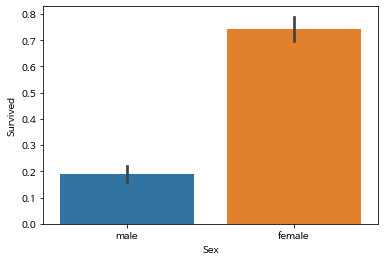

In [12]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

---

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

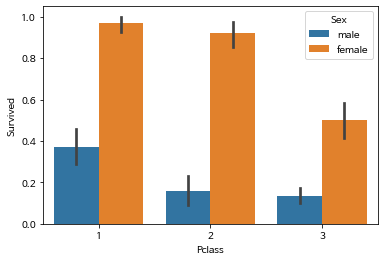

In [13]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [14]:
# -----------------------------------------------------------

<AxesSubplot:xlabel='Age', ylabel='Survived'>

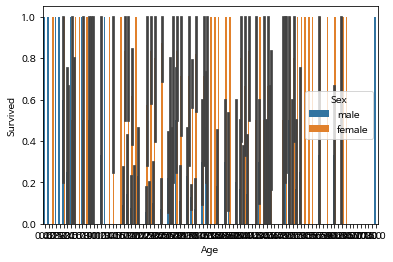

In [15]:
sns.barplot(x='Age', y='Survived', hue='Sex', data=titanic_df)

In [16]:
# -----------------------------------------------------------

In [17]:
# 복잡하게 나타나므로, 나이를 구간으로 나눠서 그래프를 그려본다.

def get_category(age) :
    cat = ''
    if age <= -1 : cat='Unknow'
    elif age <= 5 : cat='Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat='Elderly'
    
    return cat

In [18]:
plt.figure(figsize=(10, 6))

group_names = ['Unknow', 'Baby', 'Child', 'Teenager',  'Student', 'Young Adult', 'Adult','Elderly']

# age 라는 컬럼에 apply로 적용시키겠다
# lambda x 에 
# age값 하나가 x에 담겨서 작업을 한다.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

<Figure size 720x432 with 0 Axes>

In [19]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

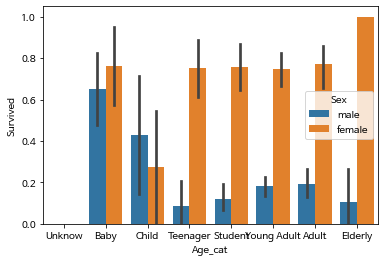

In [20]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

In [21]:
def encode_feature(dataDF) :
    from sklearn.preprocessing import LabelEncoder
    
    # categorical 컬럼이름
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features :
        dataDF[feature] = LabelEncoder().fit_transform(dataDF[feature])
        
    return dataDF

In [22]:
titanic_df = encode_feature(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [23]:
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df
    
def drop_features(df) :
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    
    return df


def format_features(df) :
    from sklearn.preprocessing import LabelEncoder
    
    df.Cabin = df.Cabin.str[:1]
    
    # categorical 컬럼이름
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features :
        df[feature] = LabelEncoder().fit_transform(df[feature])
        
    return df


def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [24]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, 
                                                    y_titanic_df, 
                                                    test_size=0.2,
                                                    random_state=11)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [28]:
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [29]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

In [30]:
print('dt',accuracy_score(y_test,dt_pred))
print('rf',accuracy_score(y_test,rf_pred))
print('lr',accuracy_score(y_test,lr_pred))

dt 0.7877094972067039
rf 0.8547486033519553
lr 0.8491620111731844


---
# day 03

In [31]:
from sklearn.model_selection import KFold

In [32]:
def exec_kfold(clf, folds=5) :
    kfold = KFold(n_splits=folds)
    
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # kfold.split(X_titanic_df)
        # [ (array( [] )), (array( [] )), (array( [] )), ... , (array( [] )) ] 형태로 나타남.
        # [ ( ), ( ), ... , ( )] 형태 => 튜플 개수가 폴드(n_splits) 개수임.
        
        # index값을 이용해서 데이터 분리 시키기
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # classifier 모델으로 학습 및 스코어 확인
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        
        print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
        
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score}')
        

In [33]:
list(KFold(n_splits=2).split(X_titanic_df));

In [34]:
exec_kfold(dt_clf)

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균 정확도 : 0.782298662984119


In [35]:
exec_kfold(rf_clf)

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.8090
교차검증 2 정확도 : 0.8371
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8596
평균 정확도 : 0.8148389931579938


In [36]:
exec_kfold(lr_clf)

교차검증 0 정확도 : 0.8045
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7753
교차검증 3 정확도 : 0.7584
교차검증 4 정확도 : 0.8371
평균 정확도 : 0.7912309334002887


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores) :
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    
print(f'평균정확도 : {np.mean(scores)}')

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균정확도 : 0.7879291946519366


In [39]:
scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores) :
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    
print(f'평균정확도 : {np.mean(scores)}')

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7978
교차검증 2 정확도 : 0.8483
교차검증 3 정확도 : 0.7640
교차검증 4 정확도 : 0.8652
평균정확도 : 0.8137153976523758


In [40]:
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores) :
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    
print(f'평균정확도 : {np.mean(scores)}')

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7697
교차검증 2 정확도 : 0.7809
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8146
평균정확도 : 0.7878664239532985


---
#### 셔플

In [50]:
def exec_kfold_shuffle(clf, folds=5) :
    kfold = KFold(n_splits=folds, shuffle=True)
    
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # kfold.split(X_titanic_df)
        # [ (array( [] )), (array( [] )), (array( [] )), ... , (array( [] )) ] 형태로 나타남.
        # [ ( ), ( ), ... , ( )] 형태 => 튜플 개수가 폴드(n_splits) 개수임.
        
        # index값을 이용해서 데이터 분리 시키기
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # classifier 모델으로 학습 및 스코어 확인
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        
        print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
        
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score}')
        

In [51]:
list(KFold(n_splits=2).split(X_titanic_df));

In [65]:
exec_kfold_shuffle(dt_clf)

교차검증 0 정확도 : 0.7486
교차검증 1 정확도 : 0.7640
교차검증 2 정확도 : 0.7978
교차검증 3 정확도 : 0.8202
교차검증 4 정확도 : 0.7753
평균 정확도 : 0.7811813445483649


In [66]:
exec_kfold_shuffle(rf_clf)

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.8090
교차검증 2 정확도 : 0.8427
교차검증 3 정확도 : 0.7809
교차검증 4 정확도 : 0.8315
평균 정확도 : 0.8125855250768941


In [67]:
exec_kfold_shuffle(lr_clf)

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7921
교차검증 4 정확도 : 0.7697
평균 정확도 : 0.7856192329420626


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores) :
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    
print(f'평균정확도 : {np.mean(scores)}')

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균정확도 : 0.7879291946519366


In [70]:
scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores) :
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    
print(f'평균정확도 : {np.mean(scores)}')

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7978
교차검증 2 정확도 : 0.8483
교차검증 3 정확도 : 0.7640
교차검증 4 정확도 : 0.8652
평균정확도 : 0.8137153976523758


In [71]:
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores) :
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
    
print(f'평균정확도 : {np.mean(scores)}')

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7697
교차검증 2 정확도 : 0.7809
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8146
평균정확도 : 0.7878664239532985


---
### GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8]
}

In [89]:
# refit=True : 제일 좋았던 파라미터로 학습한다.(기본값 True)
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, verbose=2)

grid_dclf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_le

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy', verbose=2)

In [90]:
grid_dclf.cv_results_ ;

In [91]:
grid_dclf.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [92]:
grid_dclf.best_score_

0.7991825076332119

In [93]:
best_dclf = grid_dclf.best_estimator_

dpred = best_dclf.predict(X_test)

accuracy_score(y_test, dpred)

0.8715083798882681